# Validate the parachute deployment algorithm

In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

### Add spaceX-CRS-8 (time, velocity, altitude) data
### 이상적인 데이터 df1

In [2]:
df1 = pd.read_csv("Datas/SpaceX_CRS-12.csv")
df1

,time,velocity,altitude
0,0.000,0.000,0.0
1,0.033,0.277,0.0
2,0.066,0.555,0.0
3,0.100,0.555,0.0
4,0.133,0.555,0.0
...,...,...,...
13679,479.946,0.000,0.0
13680,479.979,0.000,0.0
13681,480.012,0.000,0.0
13682,480.046,0.000,0.0


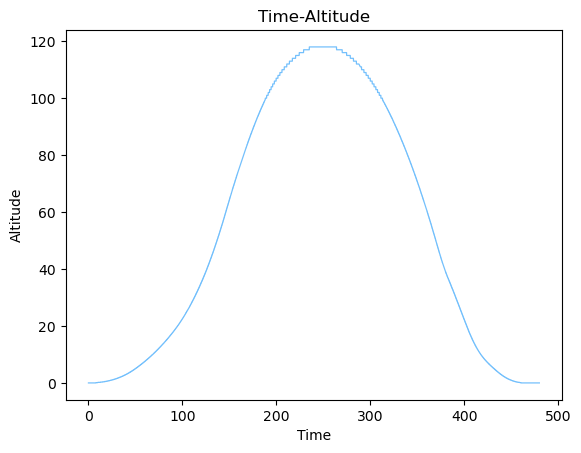

In [3]:
plt.plot(df1['time'], df1['altitude'], color='#74c0fc', lw=0.9)
plt.title('Time-Altitude')
plt.xlabel('Time')
plt.ylabel('Altitude')

plt.show()

In [4]:
datas = df1['altitude']

#Check all dataframe's Nan.
nan_check = datas.isna().any().any()

if nan_check:
    print("NaN 값이 존재합니다.")
else:
    print("NaN 값이 없습니다.")
print("------------------------------------------")

#Add radom decimal point
for i in range(0, len(datas)):
    if(datas[i] != 0):
        datas[i] = datas[i] + random.uniform(0.0001, 0.01)

datas

NaN 값이 없습니다.
------------------------------------------


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13679    0.0
13680    0.0
13681    0.0
13682    0.0
13683    0.0
Name: altitude, Length: 13684, dtype: float64

In [5]:
apogee_index = df1['altitude'].idxmax()
apogee_index

7304

In [6]:
import time
import numpy as np
import datetime
import multiprocessing
import sys
import matplotlib.pyplot as plt

WINDOW = 10
THRESHOLD = 2  #이상치 임계값
NO_DEPLOY_ALTITUDE = 1
FALLING_CONFIRMATION = 3

dt = [] 
moving_averages = []
falling_count = 0

#plot datas
deploy=[]
fall=[]

for i in range(0, (len(datas) - WINDOW + 1)):
        altitude = datas[(i+WINDOW-1)]
        mean = np.mean(datas[(i):(i+WINDOW)])
#         std = np.std(datas[(i):(i+WINDOW)])
        dt.append(altitude)
        moving_averages.append(mean)
        
        if  len(moving_averages) > 2 and moving_averages[-2]>moving_averages[-1]: 
            falling_count += 1
#             print("DOWN", falling_count)
            fall.append([(i+WINDOW-1), altitude])
        else: 
            falling_count = 0
#             print("UP")
        
        if falling_count > FALLING_CONFIRMATION and moving_averages[-1] > NO_DEPLOY_ALTITUDE:
            deploy.append([(i+WINDOW-1), altitude])
#             print("------------------------------DEPLOY----------------------------")
#         print(f"Index: {i}")
#         print('Altitude : {:.5f}'.format(altitude))


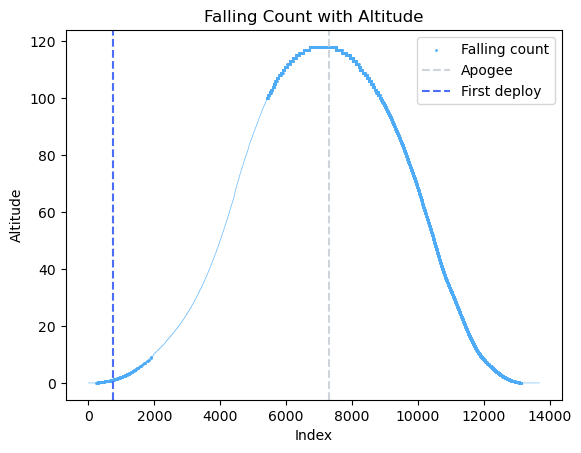

In [7]:
fallingCount = pd.DataFrame(fall, columns= ['index', 'altitude'])

plt.plot(df1.index, df1['altitude'], color='#74c0fc',lw=0.5, zorder=0)

plt.scatter(fallingCount['index'],fallingCount['altitude'], color='#4dabf7', s=1, marker='o', label='Falling count', zorder=1)

plt.axvline(x=apogee_index, color='#ced4da', linestyle='--', label='Apogee')
plt.axvline(x=deploy[0][0], color='#4c6ef5', linestyle='--', label='First deploy')

plt.title('Falling Count with Altitude')
plt.xlabel('Index')
plt.ylabel('Altitude')

plt.legend()

plt.show()

### 초기 계산 sleep & FALLING_CONFIRM = 13

In [8]:
import time
import numpy as np
import datetime
import multiprocessing
import sys
import matplotlib.pyplot as plt

WINDOW = 10
THRESHOLD = 2  #이상치 임계값
NO_DEPLOY_ALTITUDE = 1
FALLING_CONFIRMATION = 13

dt = [] 
moving_averages = []
falling_count = 0

#plot datas
deploy=[]
fall=[]

for i in range(0, (len(datas) - WINDOW + 1)):
        altitude = datas[(i+WINDOW-1)]
        mean = np.mean(datas[(i):(i+WINDOW)])
#         std = np.std(datas[(i):(i+WINDOW)])
        dt.append(altitude)
        if(i >= 2000):
            moving_averages.append(mean)
            if  len(moving_averages) > 2 and moving_averages[-2]>moving_averages[-1]: 
                falling_count += 1
#                 print("DOWN", falling_count)
                fall.append([(i+WINDOW-1), altitude])
            else: 
                falling_count = 0
    #             print("UP")

            if falling_count > FALLING_CONFIRMATION and moving_averages[-1] > NO_DEPLOY_ALTITUDE:
                deploy.append([(i+WINDOW-1), altitude])
#                 print("------------------------------DEPLOY----------------------------")
#         print(f"Index: {i}")
#         print('Altitude : {:.5f}'.format(altitude))


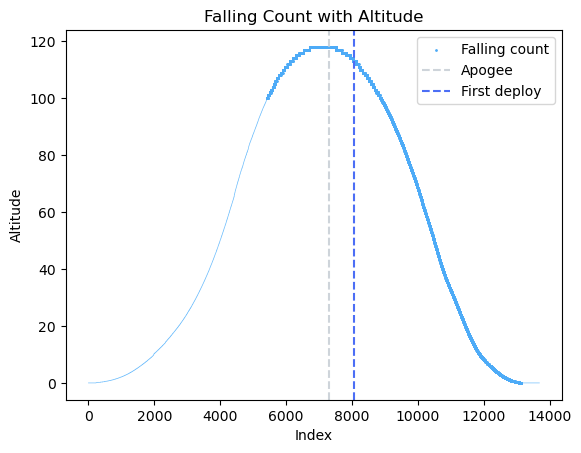

In [9]:
fallingCount = pd.DataFrame(fall, columns= ['index', 'altitude'])

plt.plot(df1.index, df1['altitude'], color='#74c0fc',lw=0.5, zorder=0)

plt.scatter(fallingCount['index'],fallingCount['altitude'], color='#4dabf7', s=1, marker='o', label='Falling count', zorder=1)

plt.axvline(x=apogee_index, color='#ced4da', linestyle='--', label='Apogee')
plt.axvline(x=deploy[0][0], color='#4c6ef5', linestyle='--', label='First deploy')

plt.title('Falling Count with Altitude')
plt.xlabel('Index')
plt.ylabel('Altitude')

plt.legend()

plt.show()

In [10]:
apogeeTime = df1.loc[apogee_index, 'time']
firstDeployTime = df1.loc[deploy[0][0], 'time']
print(f"Apogee까지 걸린 시간: {apogeeTime}")
print(f"First deploy까지 걸린 시간: {firstDeployTime}")

Apogee까지 걸린 시간: 256.956
First deploy까지 걸린 시간: 282.515


### 오픈로켓을 사용하여 얻어낸 예상 Apogee까지 걸린 시간: 9.08s

In [11]:
openRocket = 9.08
expectDeployTime =  (firstDeployTime * openRocket) / apogeeTime
print(f"예상 Deploy 시간: {round(expectDeployTime, 3)}s")

예상 Deploy 시간: 9.983s


### 비례식 사용
### 위 데이터에서 얻은 1) 최고 고도 도달 시간, 2) 사출까지 걸린 시간
### openrocket에서 얻은 3) 예상 최고 고도 도달 시간

### FALLING_CONFIRMATION = 13으로 설정 시 예상되는 
### 첫 번째 Deploy 시간은 9.501s 이다
### 하지만 비교 데이터와의 엔진 스펙이 다르고,
### openrocket 데이터의 신뢰성 또한 모르기 때문에 활용 여부는 고민
### ★초기 sleep 추가 필요★